In [7]:
import math, numpy
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [8]:
def v(x,t,n):
    Bn = (n*math.pi*math.cos(n*math.pi) - math.sin(n*math.pi))/((n*math.pi)**2)
    serie = math.sin(n*math.pi*x)*math.exp(-t*(n*math.pi)**2)
    return Bn*serie
def v2d(x,y,t,n):
    Bn = (-16*math.sin(math.pi*n/2))/(math.pi*n)**2
    serie = math.sin(n*math.pi*x)*math.sin(n*math.pi*y)*math.exp(-t*2*(n*math.pi)**2)
    return Bn*serie

#@njit()
def aprox(L,t,sol2d,nx):
    for xx in range(101):
        for yy in range(101):
            for nn in range(1,nx):
#                for mm in range(1,nx):
                sol2d[xx,yy] += v2d(L[xx], L[yy], t, nn)
            sol2d[xx,yy] += 1
    return sol2d
    

In [9]:
L=np.linspace(0,1,101)
#sol = np.zeros(101)
nx = 100
t = 0.1
sol2d = np.zeros([101,101])

In [10]:
sol2d = aprox(L,t,sol2d,nx)

In [11]:
print(sol2d)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99977782 0.99955585 ... 0.99955585 0.99977782 1.        ]
 [1.         0.99955585 0.99911214 ... 0.99911214 0.99955585 1.        ]
 ...
 [1.         0.99955585 0.99911214 ... 0.99911214 0.99955585 1.        ]
 [1.         0.99977782 0.99955585 ... 0.99955585 0.99977782 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


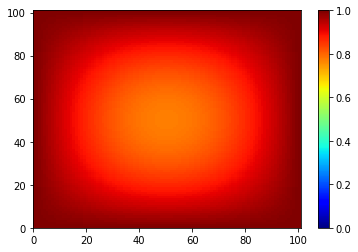

In [12]:
im=plt.pcolormesh(sol2d,cmap='jet',vmin=0., vmax=1.)
plt.colorbar(im)